# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [1]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

# Print the first five rows of the data
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

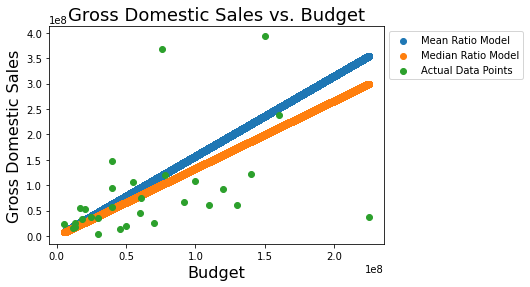

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [7]:
def rss(m, X=df['budget'], y=df['domgross']):
    residuals = df['domgross'] - (m * df['budget'])
    rs = residuals ** 2
    rss = rs.sum()
    return rss

## Find the RSS for the two models
Which of the two models is better?

In [8]:
# Your code here
print('RSS for 1.575⋅budget:', rss(1.575))
print('RSS for 1.331⋅budget', rss(1.331))

RSS for 1.575⋅budget: 2.7614512142376128e+17
RSS for 1.331⋅budget 2.3547212057814554e+17


In [9]:
# Your response here
'''1.331 is currently performing better.  The since we are using RSS instead of RMSE the
numbers don't acually mean anything other than comparing magnitude'''


"1.331 is currently performing better.  The since we are using RSS instead of RMSE the\nnumbers don't acually mean anything other than comparing magnitude"

## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

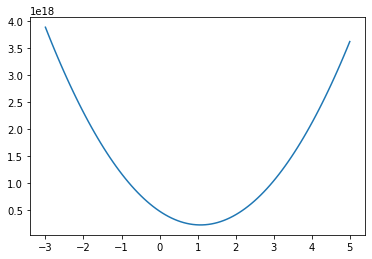

In [13]:
# Your code here
x = np.linspace(-3,5,100)
y = [rss(z) for z in x]
plt.plot(x, y)

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [51]:
# Set a starting point
cur_x = 1.5

# Initialize a step size
alpha = 0.1*10**(-7)

# Initialize a precision
precision = 0.0000000001 

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000 

# Iteration counter
iters = 0 


# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above
for i in range(max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, rss(cur_x)))

    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    print('gradient',gradient)
    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    prev_x = cur_x
    cur_x -= gradient * alpha
    print(prev_x, cur_x)
    # Update the iteration number
    # really check if we have met precision
    # change in loss function.
    #previous_step_size = abs(prev_x - cur_x)
    previous_step_size = abs(cur_x - prev_x)

    print('prev_x:', prev_x, ' cur_x', cur_x)
    print(abs(prev_x - cur_x), abs(cur_x - prev_x))
    # why does order matter here if its an absolute value??
    
    if previous_step_size < precision:
        print("Precision met")
        break


# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)

Current value: 1.5 RSS Produced: 2.6084668957174013e+17
gradient 3669344.2855751812
1.5 1.4633065571442483
prev_x: 1.5  cur_x 1.4633065571442483
0.03669344285575171 0.03669344285575171
Current value: 1.4633065571442483 RSS Produced: 2.5426622805102646e+17
gradient 124609.31658491492
1.4633065571442483 1.4620604639783992
prev_x: 1.4633065571442483  cur_x 1.4620604639783992
0.0012460931658491159 0.0012460931658491159
Current value: 1.4620604639783992 RSS Produced: 2.5405318902052646e+17
gradient 4219.8587211072445
1.4620604639783992 1.4620182653911882
prev_x: 1.4620604639783992  cur_x 1.4620182653911882
4.219858721099534e-05 4.219858721099534e-05
Current value: 1.4620182653911882 RSS Produced: 2.540459865092866e+17
gradient 142.89073997735977
1.4620182653911882 1.4620168364837884
prev_x: 1.4620182653911882  cur_x 1.4620168364837884
1.4289073997364454e-06 1.4289073997364454e-06
Current value: 1.4620168364837884 RSS Produced: 2.5404574263521674e+17
gradient 4.838479071855545
1.462016836483

In [53]:
# Set a starting point
cur_x = 1.5

# Initialize a step size
alpha = 10**(-7) #0.001

# Initialize a precision
precision = 0.0000000001 

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000 

# Iteration counter
iters = 0 


# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above
while (previous_step_size > precision) & (iters < max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, rss(cur_x)))
    prev_x = cur_x
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    print('gradient',gradient)

    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    cur_x -= gradient * alpha

    # Update the iteration number
    # really check if we have met precision
    # change in loss function.
    
    previous_step_size = abs(prev_x - cur_x)
    
    iters += 1


# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)

Current value: 1.5 RSS Produced: 2.6084668957174013e+17
gradient 3669344.2855751812
Current value: 1.133065571442482 RSS Produced: 2.2177730533770314e+17
gradient 198825.1916758418
Current value: 1.1131830522748978 RSS Produced: 2.2135715390729418e+17
gradient 7076.365808129311
Current value: 1.1124754156940848 RSS Produced: 2.21345414998669e+17
gradient 247.1643062233925
Current value: 1.1124506992634624 RSS Produced: 2.2134500897406422e+17
gradient 8.627268135547638
Current value: 1.1124498365366489 RSS Produced: 2.213449948066475e+17
gradient 0.30112776160240173
Current value: 1.1124498064238728 RSS Produced: 2.2134499431215123e+17
gradient 0.010510623455047607
Current value: 1.1124498053728105 RSS Produced: 2.213449942948913e+17
gradient 0.0003668367862701416
The local minimum occurs at 1.1124498053361267


### Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

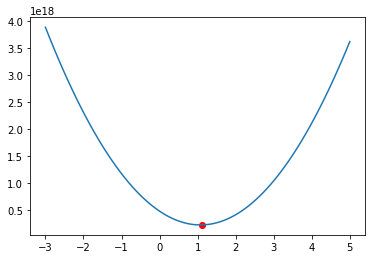

In [54]:
# Your code here
# Your code here
x = np.linspace(-3,5,100)
y = [rss(z) for z in x]
plt.plot(x, y)
plt.scatter(cur_x, rss(cur_x), color='red')

## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!